In [2]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")

In [4]:
!pwd
!ls ./../ros_nodes/franka_nn_node/

/home/eetu/multi-agent-rl-omni/notebooks
datacsv		      e3_p3_m1_3.csv	       models
e3_p1_baseline_2.csv  e3_p3_m1_4.csv	       moveit.py
e3_p1_m2_2.csv	      e3_p3_m2_2.csv	       move_to_start.py
e3_p2_baseline_2.csv  e3_p3_m2_3.csv	       output2.csv
e3_p2_m2_2.csv	      e3_p3_m2_4.csv	       output.csv
e3_p3_baseline_2.csv  export_data.py	       panda_files
e3_p3_baseline_3.csv  export.py		       plot.py
e3_p3_baseline_4.csv  franka_rl_node.py        test.py
e3_p3_m1_2.csv	      mobilefranka_rl_node.py


In [3]:
df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_baseline_2.csv")
run1 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_baseline_3.csv")
run2 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_baseline_4.csv")
run3 = df.iloc[:, -2:]

baseline = pd.concat([run1, run2, run3], keys=['run1', 'run2', 'run3'])

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m1_2.csv")
run1 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m1_3.csv")
run2 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m1_4.csv")
run3 = df.iloc[:, -2:]

m1 = pd.concat([run1, run2, run3], keys=['run1', 'run2', 'run3'])

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m2_2.csv")
run1 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m2_3.csv")
run2 = df.iloc[:, -2:]

df = pd.read_csv("./../ros_nodes/franka_nn_node/e3_p3_m2_4.csv")
run3 = df.iloc[:, -2:]

m2 = pd.concat([run1, run2, run3], keys=['run1', 'run2', 'run3'])

all = pd.concat([baseline, m1, m2], keys=['baseline', 'm1', 'm2'], names=['method', 'run', "row_id"])

all = all.reset_index()

all = all.drop(columns=['row_id'])

all


,method,run,distance_from_target,elapsed_time
0,baseline,run1,1.851946,0.071724
1,baseline,run1,1.852031,0.173232
2,baseline,run1,1.852023,0.274575
3,baseline,run1,1.852574,0.366084
4,baseline,run1,1.852660,0.467459
...,...,...,...,...
3874,m2,run3,0.525077,36.860182
3875,m2,run3,0.524980,36.921283
3876,m2,run3,0.524389,37.012558
3877,m2,run3,0.523119,37.094125


In [25]:
m2.reset_index()

,level_0,level_1,distance_from_target,elapsed_time
0,run1,0,1.849961,0.074191
1,run1,1,1.849411,0.145468
2,run1,2,1.855263,0.206692
3,run1,3,1.855304,0.277896
4,run1,4,1.851864,0.338967
...,...,...,...,...
1438,run3,501,0.525077,36.860182
1439,run3,502,0.524980,36.921283
1440,run3,503,0.524389,37.012558
1441,run3,504,0.523119,37.094125


<Axes: xlabel='elapsed_time', ylabel='distance_from_target'>

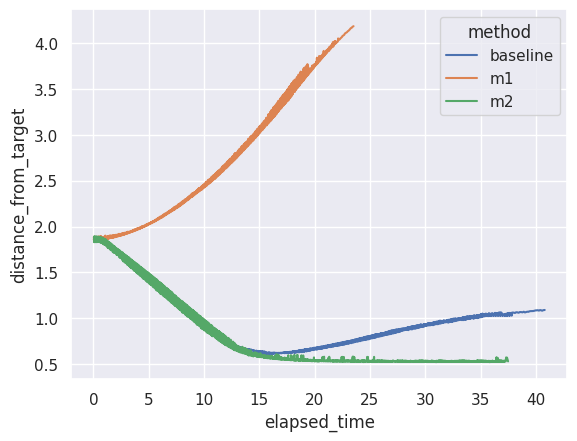

In [4]:
sns.lineplot(data=all, y="distance_from_target", x="elapsed_time", hue="method")

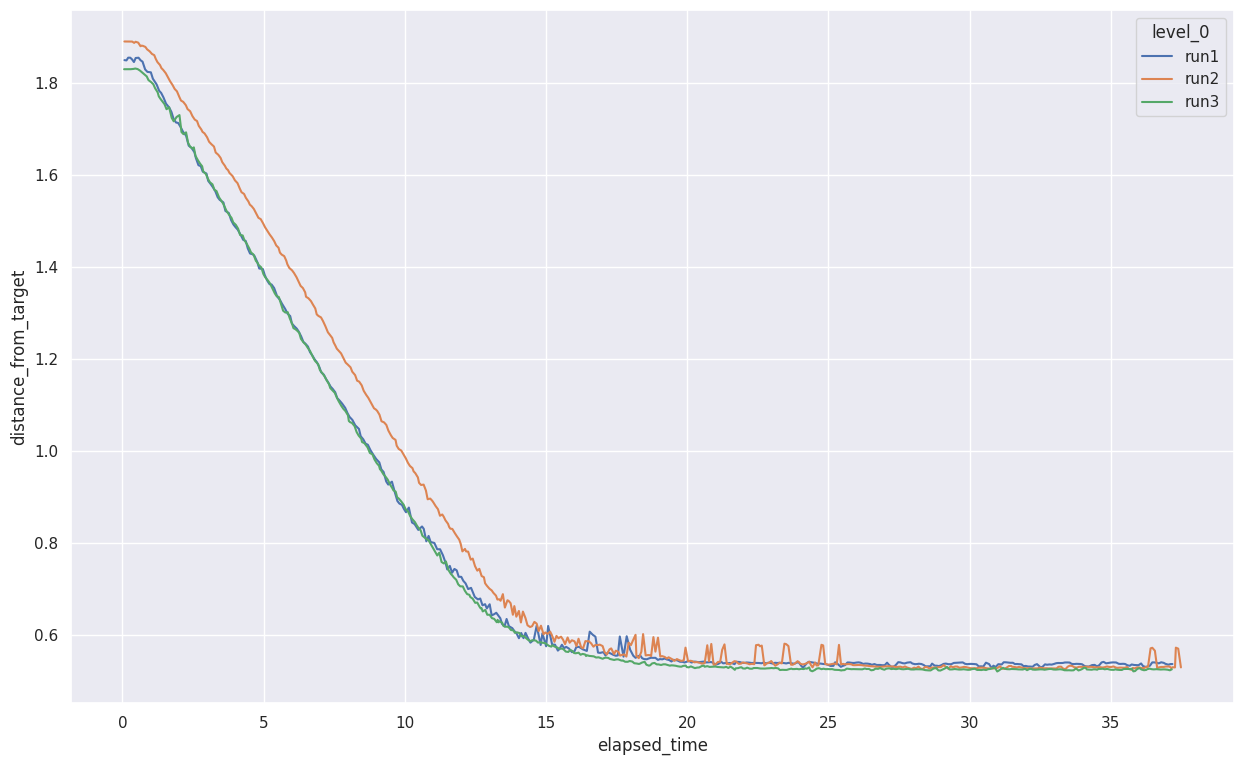

In [27]:
ax = sns.lineplot(data=m2.reset_index(), y="distance_from_target", x="elapsed_time", hue="level_0")
ax.figure.set_size_inches(15.0, 9.0)

In [23]:
sns.lineplot(data=m2, y="distance_from_target", x="elapsed_time", hue="run")

ValueError: Could not interpret value `method` for parameter `hue`

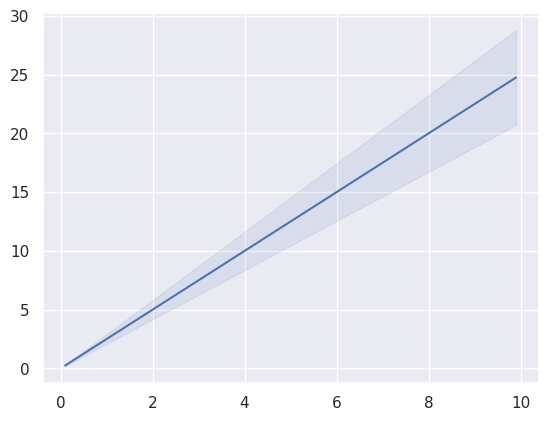

In [41]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0.1, 9.9, 20)
y1 = 3.0 * x
y2 = 2.5 * x
y3 = 2.0 * x
y = np.array([y1, y2, y3])
std = np.std(y, axis=0)
mu = np.mean(y, axis=0)
#some confidence interval
#ci = np.std(y1)

fig, ax = plt.subplots()
ax.plot(x,mu)
ax.fill_between(x, (mu-std), (mu+std), color='b', alpha=.1)

#print(y)

In [29]:
x

array([0.1       , 0.61578947, 1.13157895, 1.64736842, 2.16315789,
       2.67894737, 3.19473684, 3.71052632, 4.22631579, 4.74210526,
       5.25789474, 5.77368421, 6.28947368, 6.80526316, 7.32105263,
       7.83684211, 8.35263158, 8.86842105, 9.38421053, 9.9       ])